Text(0, 0.5, 'Cena zamknięcia')

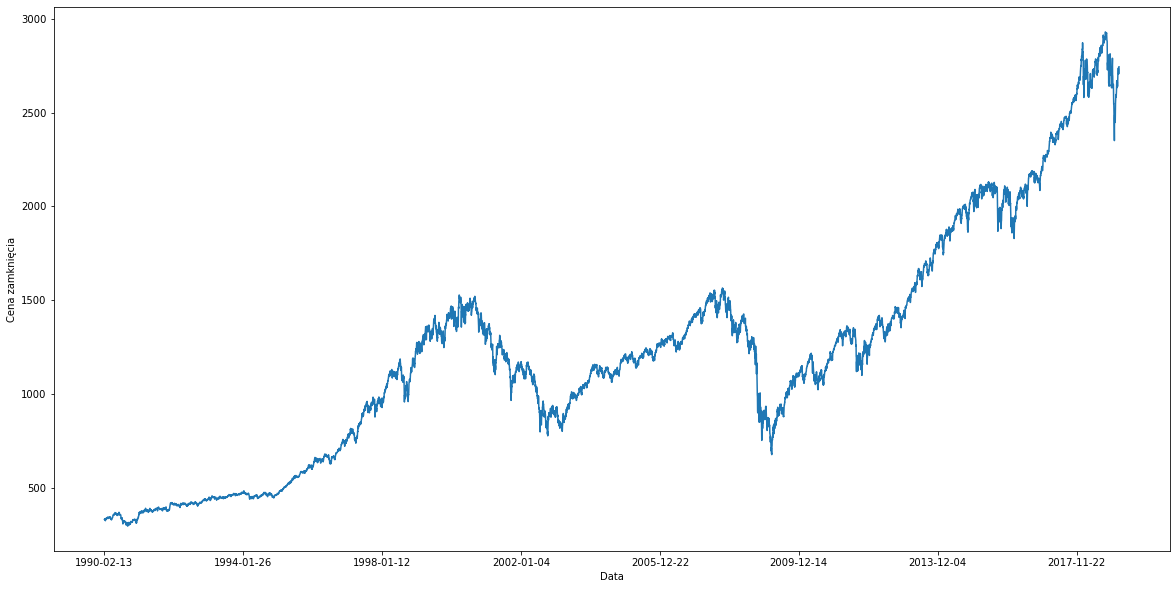

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

import pandas as pd

df = pd.read_csv("sp500.csv")

df.index = df.Date
ax = df.Close.plot()
ax.set_xlabel("Data")
ax.set_ylabel("Cena zamknięcia")



In [2]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
1990-02-13,1990-02-13,330.079987,331.609985,327.920013,331.019989,331.019989,144490000
1990-02-14,1990-02-14,331.019989,333.200012,330.640015,332.010010,332.010010,138530000
1990-02-15,1990-02-15,332.010010,335.209991,331.609985,334.890015,334.890015,174620000
1990-02-16,1990-02-16,334.890015,335.640015,332.420013,332.720001,332.720001,166840000
1990-02-20,1990-02-20,332.720001,332.720001,326.260010,327.989990,327.989990,147300000


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2019-02-06,2019-02-06,2735.050049,2738.080078,2724.149902,2731.610107,2731.610107,3472690000
2019-02-07,2019-02-07,2717.530029,2719.320068,2687.260010,2706.050049,2706.050049,4099490000
2019-02-08,2019-02-08,2692.360107,2708.070068,2681.830078,2707.879883,2707.879883,3622330000
2019-02-11,2019-02-11,2712.399902,2718.050049,2703.790039,2709.800049,2709.800049,3361970000
2019-02-12,2019-02-12,2722.610107,2748.189941,2722.610107,2744.729980,2744.729980,3827770000


([<matplotlib.axis.XTick at 0x10f636090>,
 <a list of 5 Text xticklabel objects>)

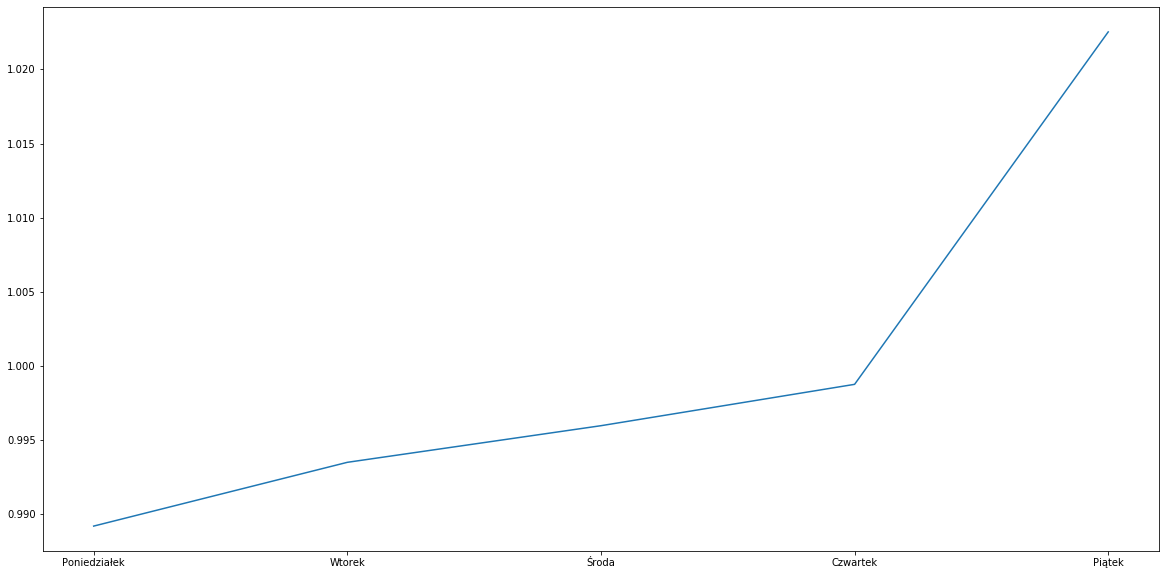

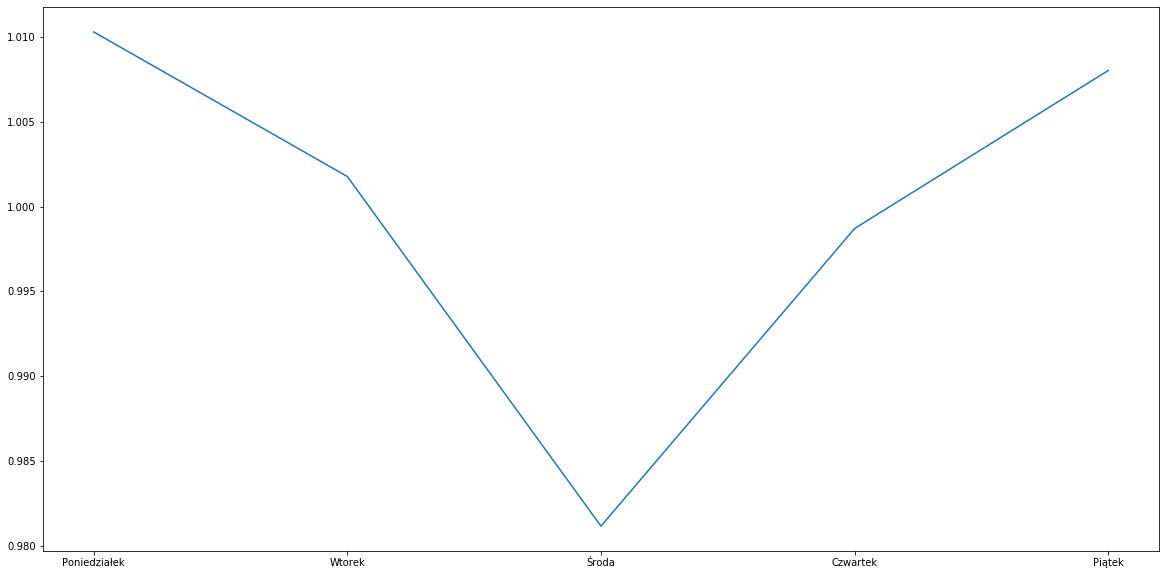

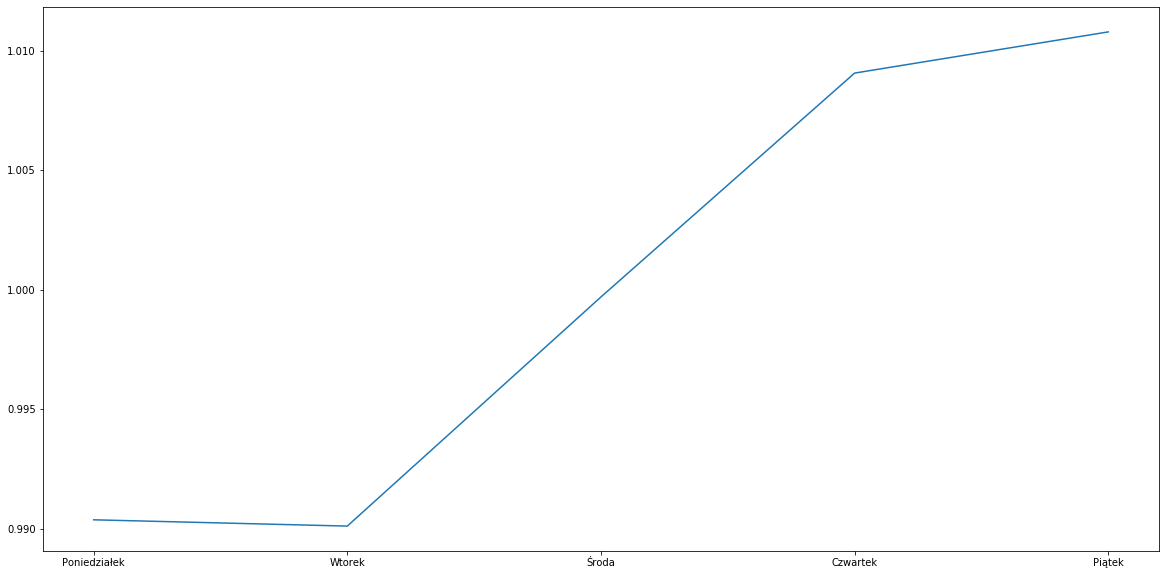

In [4]:
import numpy as np
## Wybieramy 3 tygodnie (pon-pt) z trzech lat
## Ceny zamknięcia w każdym dniu przeskalowujemy, dzieląc je przez średnią tygodniową cenę zamknięcia

## 1990
vals = df['1990-05-07':'1990-05-11'].Close.values
mean_val = np.mean(vals)
plt.figure()
plt.plot([1, 2, 3, 4, 5], vals/mean_val)
plt.xticks([1, 2, 3, 4, 5],
           labels = ['Poniedziałek', 'Wtorek', 'Środa', 'Czwartek', 'Piątek'])

## 2000
vals = df['2000-05-08':'2000-05-12'].Close.values
mean_val = np.mean(vals)
plt.figure()
plt.plot([1, 2, 3, 4, 5], vals/mean_val)
plt.xticks([1, 2, 3, 4, 5],
           labels = ['Poniedziałek', 'Wtorek', 'Środa', 'Czwartek', 'Piątek'])

## 2018
vals = df['2018-05-07':'2018-05-11'].Close.values
mean_val = np.mean(vals)
plt.figure()
plt.plot([1, 2, 3, 4, 5], vals/mean_val)
plt.xticks([1, 2, 3, 4, 5],
           labels = ['Poniedziałek', 'Wtorek', 'Środa', 'Czwartek', 'Piątek'])

Text(0, 0.5, 'Dzienny zwrot')

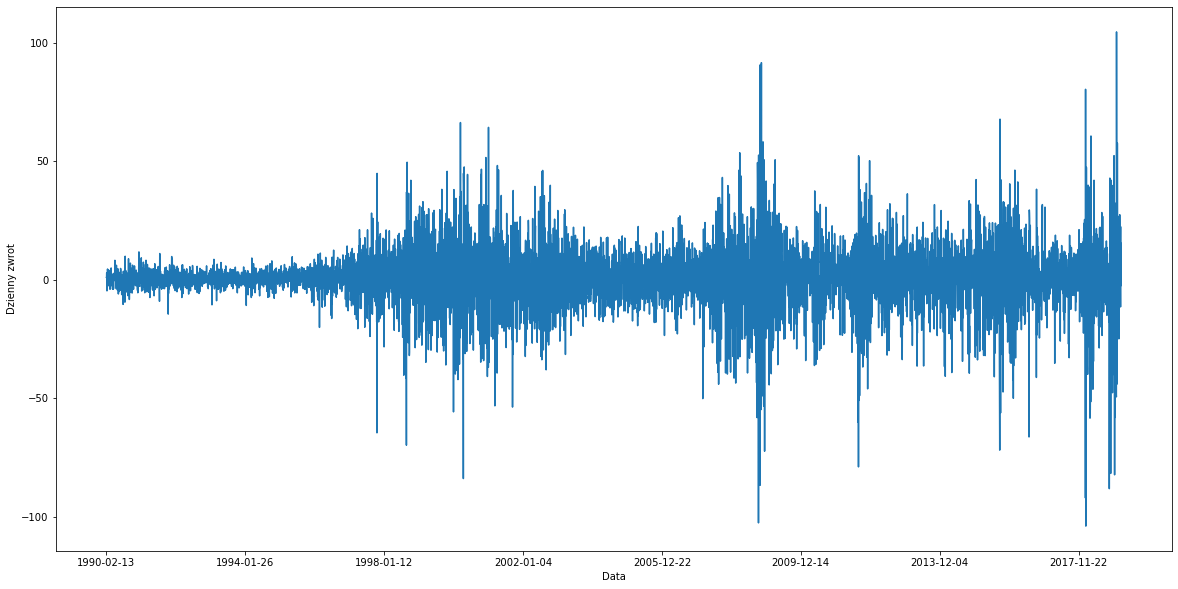

In [5]:
df['Return'] = df.Close - df.Open
ax = df.Return.plot()
ax.set_xlabel("Data")
ax.set_ylabel("Dzienny zwrot")



Text(0, 0.5, 'Dzienna zmienność')

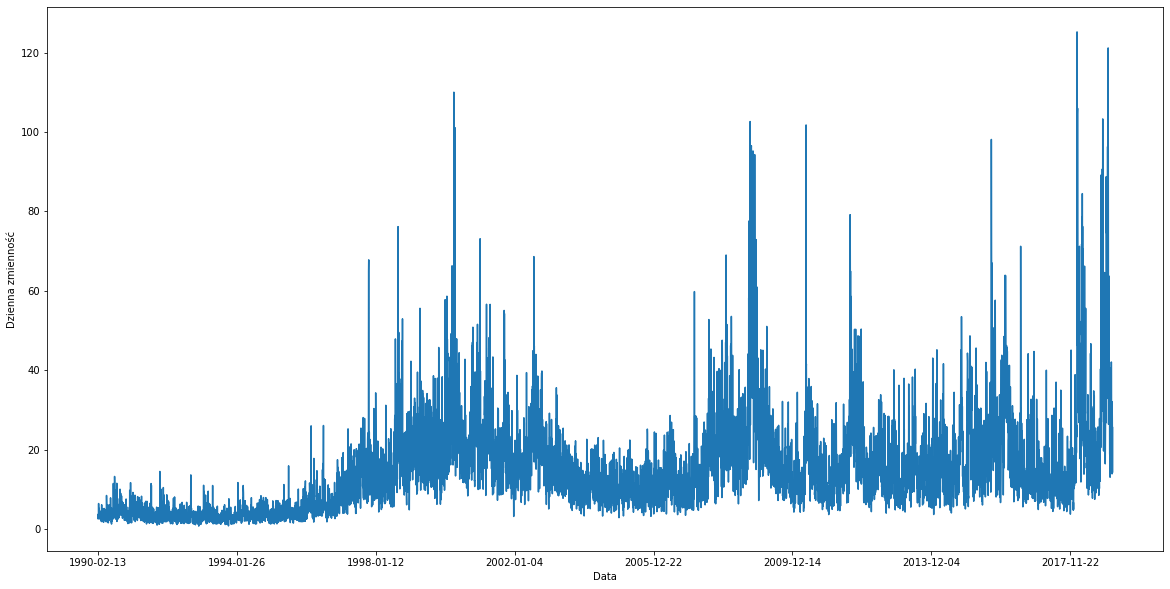

In [6]:
df['DailyVolatility'] = df.High - df.Low
ax = df.DailyVolatility.plot()
ax.set_xlabel("Data")
ax.set_ylabel("Dzienna zmienność")

Text(0, 0.5, 'Dzienna zmienność po zastosowaniu wygładzania wykladniczego z ważoną\xa0średnią ruchomą ')

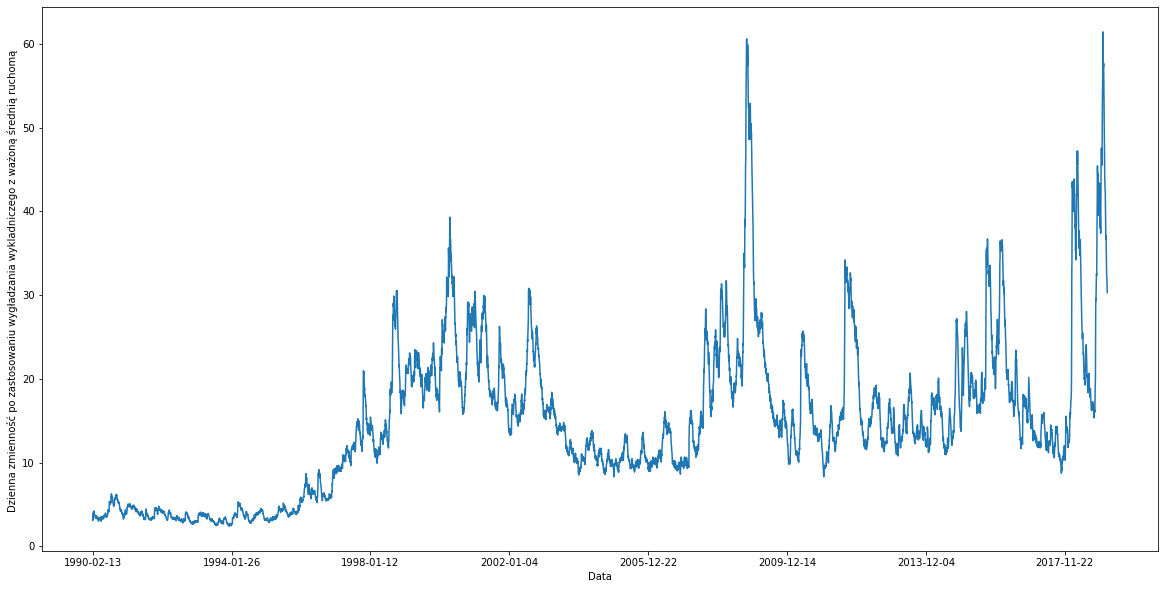

In [7]:
ewdf = df.ewm(halflife = 10).mean()
ax = ewdf.DailyVolatility.plot()
ax.set_xlabel("Data")
ax.set_ylabel("Dzienna zmienność po zastosowaniu wygładzania wykladniczego z ważoną średnią ruchomą ")

Text(0, 0.5, 'Przeskalowana dzienna zmienność')

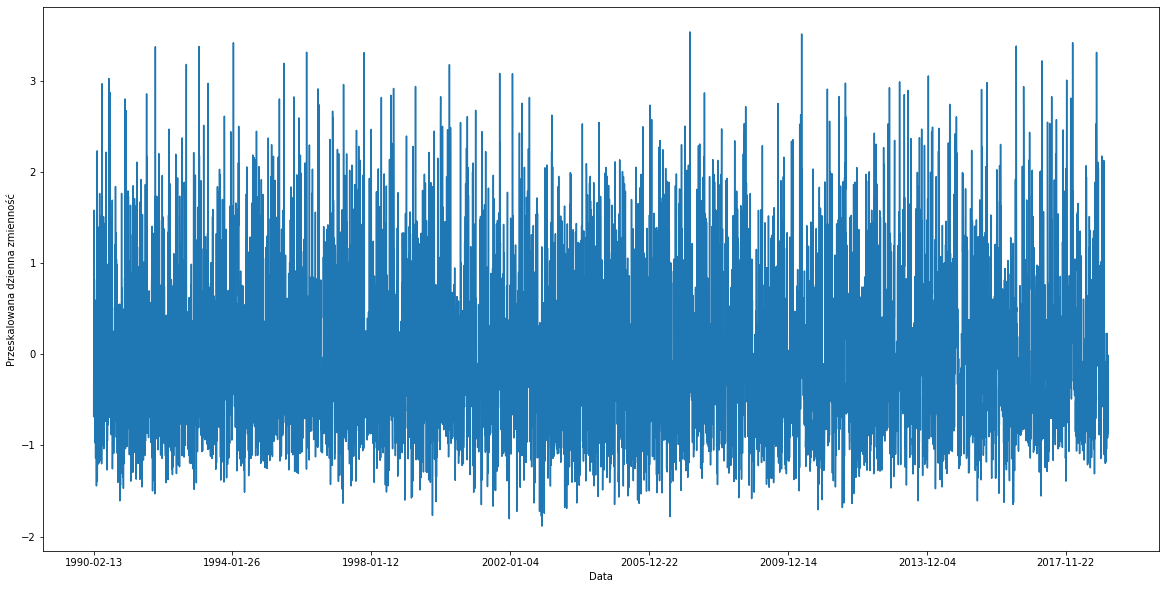

In [9]:
## Obliczmy wykładniczo ważoną wariancję
vewdf = df.ewm(halflife = 10).var()

## Skalowanie poprzez odjęcie średniej i normalizację
scaled = df.DailyVolatility - ewdf.DailyVolatility
scaled = scaled / vewdf.DailyVolatility**0.5
ax = scaled.plot()
ax.set_xlabel("Data")
ax.set_ylabel("Przeskalowana dzienna zmienność")

In [10]:
df['ScaledVolatility'] = ((df.DailyVolatility - 
                           ewdf.DailyVolatility)
                           / vewdf.DailyVolatility**0.5 )
df['ScaledReturn'] = ((df.Return - ewdf.Return)
                       / vewdf.Return**0.5 )
df['ScaledVolume'] = ((df.Volume - ewdf.Volume) 
                       / vewdf.Volume**0.5 )



In [11]:
df = df.dropna()


In [12]:
## Podział danych na zbióry uczący i testowy
train_df = df[:7000]
test_df = df[7000:]

## Tworzymy potok przetwarzania, z zbioru uczącego
## pobieramy jedynie te zmienne, które nas interesują.
horizon = 10
X = train_df[:(7000 - horizon)][["ScaledVolatility", "ScaledReturn", 
                                 "ScaledVolume"]].values
Y = train_df[horizon:]["ScaledReturn"].values

In [13]:
X = np.expand_dims(X, axis = 1)

In [14]:
X.shape

(6990, 1, 3)

In [15]:
X = np.split(X, X.shape[0]/10, axis = 0)
X = np.concatenate(X, axis = 1)
X.shape



(10, 699, 3)

In [16]:
## Parametry sieci
NUM_HIDDEN = 4
NUM_LAYERS = 2

## Ustawienia formatu danych
BATCH_SIZE = 64
WINDOW_SIZE = 20

## Parametry procesu uczenia
LEARNING_RATE = 1e-2
EPOCHS = 30


In [17]:
import tensorflow as tf
Xinp = tf.placeholder(dtype = tf.float32,
                      shape = [WINDOW_SIZE, None, 3])
Yinp = tf.placeholder(dtype = tf.float32, shape = [None])

/Users/filip/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/filip/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/filip/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/filip/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dty

In [18]:
with tf.variable_scope("scope1", reuse=tf.AUTO_REUSE):
    cells = [tf.nn.rnn_cell.LSTMCell(num_units=NUM_HIDDEN)
             for n in range(NUM_LAYERS)]
    stacked_rnn_cell = tf.nn.rnn_cell.MultiRNNCell(cells)
    rnn_output, states = tf.nn.dynamic_rnn(stacked_rnn_cell,
                                           Xinp,
                                           dtype=tf.float32)
    W = tf.get_variable("W_fc", [NUM_HIDDEN, 1],
                        initializer = 
                        tf.random_uniform_initializer(-.2, .2))
    ## Zauważ, że ponieważ oczekujemy zerowej średniej, nie korzystamy z biasu
    output = tf.squeeze(tf.matmul(rnn_output[-1, :, :], W))
    loss = tf.nn.l2_loss(output - Yinp)
    opt = tf.train.GradientDescentOptimizer(LEARNING_RATE)
    train_step = opt.minimize(loss)

W0525 11:44:57.123097 4598783424 deprecation.py:323] From <ipython-input-18-ef56201133d4>:3: LSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
W0525 11:44:57.125324 4598783424 deprecation.py:323] From <ipython-input-18-ef56201133d4>:4: MultiRNNCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
W0525 11:44:57.126935 4598783424 deprecation.py:323] From <ipython-input-18-ef56201133d4>:7: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
W0525 11:44:57.194661 45

In [19]:
sess = tf.Session()
sess.run(tf.tables_initializer())
sess.run(tf.global_variables_initializer())

In [20]:
## Dla każdej epoki
import math
y_hat_dict = {}
Y_dict = {}

in_sample_Y_dict = {}
in_sample_y_hat_dict = {}

for ep in range(EPOCHS):
    epoch_training_loss = 0.0
    for i in range(WINDOW_SIZE):
        X = train_df[:(7000 - WINDOW_SIZE)][["ScaledVolatility",
                                             "ScaledReturn",
                                             "ScaledVolume"]].values
        Y = train_df[WINDOW_SIZE:]["ScaledReturn"].values
        ## Uczyńmy to podzielnym przez rozmiar okna
        num_to_unpack = math.floor(X.shape[0] / WINDOW_SIZE)
        start_idx = X.shape[0] - num_to_unpack * WINDOW_SIZE
        X = X[start_idx:]
        Y = Y[start_idx:]
        
        X = X[i:-(WINDOW_SIZE-i)]
        Y = Y[i:-(WINDOW_SIZE-i)]
        
        X = np.expand_dims(X, axis = 1)
        X = np.split(X, X.shape[0]/WINDOW_SIZE, axis = 0)
        X = np.concatenate(X, axis = 1)
        Y = Y[::WINDOW_SIZE]
        
        ## UCZENIE
        ## Dzielimy dane na partie i uruchamiamy sesje treningowe
        for j in range(math.ceil(Y.shape[0] / BATCH_SIZE)):
            ll = BATCH_SIZE * j
            ul = BATCH_SIZE * (j + 1)
            
            if ul > X.shape[1]:
                ul = X.shape[1] - 1
                ll = X.shape[1]- BATCH_SIZE
            
            training_loss, _, y_hat = sess.run([loss, train_step, output],
                                       feed_dict = {
                                           Xinp: X[:, ll:ul, :], Yinp: Y[ll:ul]
                                       })
            epoch_training_loss += training_loss          
            
            in_sample_Y_dict[ep]     = Y[ll:ul] 
            ## Zauważ, że wywołanie dostarczy nam to tylko ostatnią część danych treningowych
            in_sample_y_hat_dict[ep] = y_hat
            
        ## TESTOWANIE
        X = test_df[:(test_df.shape[0] - WINDOW_SIZE)][["ScaledVolatility", "ScaledReturn", "ScaledVolume"]].values
        Y = test_df[WINDOW_SIZE:]["ScaledReturn"].values
        num_to_unpack = math.floor(X.shape[0] / WINDOW_SIZE)
        start_idx = X.shape[0] - num_to_unpack * WINDOW_SIZE
        ## Gdy musimy coś usunąć, lepiej wyrzucić dane z początku niż końca okresu treningowego
        X = X[start_idx:] 
        Y = Y[start_idx:]                              
        
        X = np.expand_dims(X, axis = 1)
        X = np.split(X, X.shape[0]/WINDOW_SIZE, axis = 0)
        X = np.concatenate(X, axis = 1)
        Y = Y[::WINDOW_SIZE]
        testing_loss, y_hat = sess.run([loss, output],
                                 feed_dict = { Xinp: X, Yinp: Y })
        ## Nota bene, nie jest to dobre podejście, poza funkcją kosztu dla 
        ## testowania powinniśmy dysponować również taką dla walidacji
        
    print("Epoka: %d   Funkcja kosztu (zbiór treningowy): %0.2f   Funkcja kosztu (zbiór testowy): %0.2f:" % (ep, epoch_training_loss, testing_loss))
    Y_dict[ep] = Y
    y_hat_dict[ep] = y_hat
    

Epoka: 0   Funkcja kosztu (zbiór treningowy): 3205.06   Funkcja kosztu (zbiór testowy): 4.62:
Epoka: 1   Funkcja kosztu (zbiór treningowy): 3202.65   Funkcja kosztu (zbiór testowy): 4.62:
Epoka: 2   Funkcja kosztu (zbiór treningowy): 3201.72   Funkcja kosztu (zbiór testowy): 4.62:
Epoka: 3   Funkcja kosztu (zbiór treningowy): 3201.03   Funkcja kosztu (zbiór testowy): 4.61:
Epoka: 4   Funkcja kosztu (zbiór treningowy): 3200.40   Funkcja kosztu (zbiór testowy): 4.61:
Epoka: 5   Funkcja kosztu (zbiór treningowy): 3199.79   Funkcja kosztu (zbiór testowy): 4.60:
Epoka: 6   Funkcja kosztu (zbiór treningowy): 3199.19   Funkcja kosztu (zbiór testowy): 4.59:
Epoka: 7   Funkcja kosztu (zbiór treningowy): 3198.59   Funkcja kosztu (zbiór testowy): 4.59:
Epoka: 8   Funkcja kosztu (zbiór treningowy): 3197.98   Funkcja kosztu (zbiór testowy): 4.58:
Epoka: 9   Funkcja kosztu (zbiór treningowy): 3197.35   Funkcja kosztu (zbiór testowy): 4.58:
Epoka: 10   Funkcja kosztu (zbiór treningowy): 3196.70   Fun

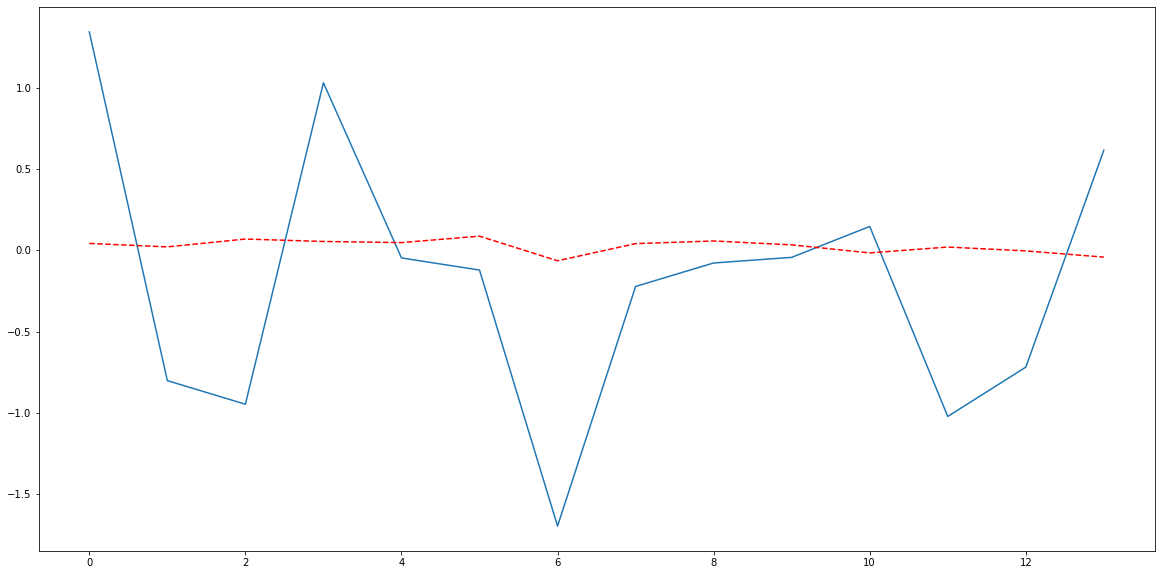

In [24]:
## python
MAX_EPOCH=EPOCHS - 1
plt.plot(Y_dict[MAX_EPOCH])
plt.plot(y_hat_dict[MAX_EPOCH], 'r--')
plt.show()

In [25]:
from scipy.stats import pearsonr, spearmanr
pearsonr(Y_dict[MAX_EPOCH], y_hat_dict[MAX_EPOCH])

(0.2815696742966768, 0.3294425527576117)

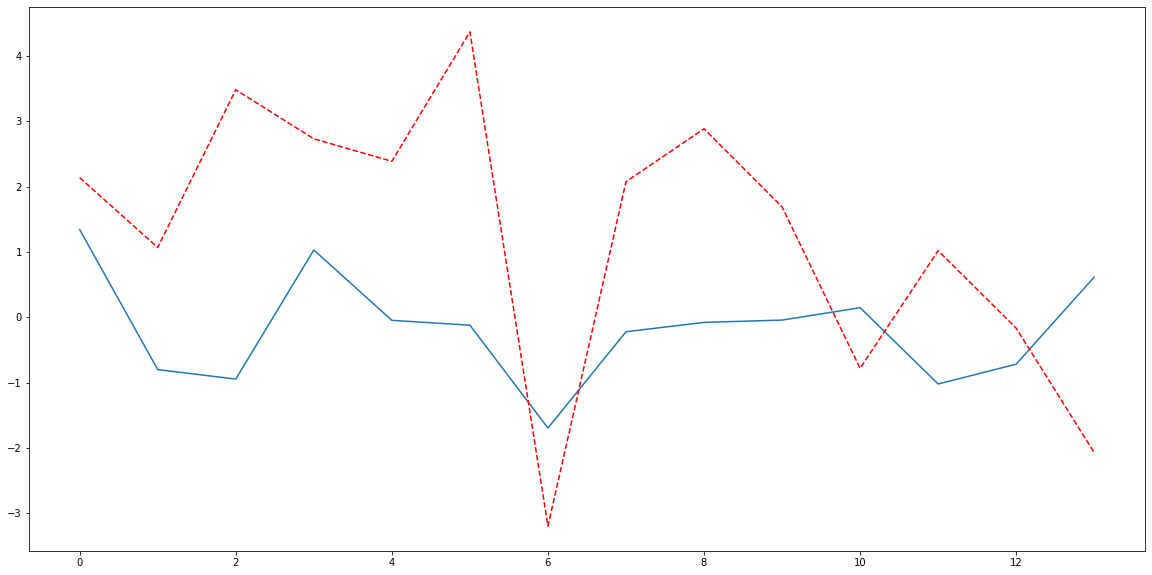

In [26]:
plt.plot(Y_dict[MAX_EPOCH][:100])
plt.plot(y_hat_dict[MAX_EPOCH][:100] * 50, 'r--')
plt.show()
